Nama : Ketut Satria Wibisana

Kelas : TK-45-G09

NIM : 1103213148



# **Filter Moving Average**


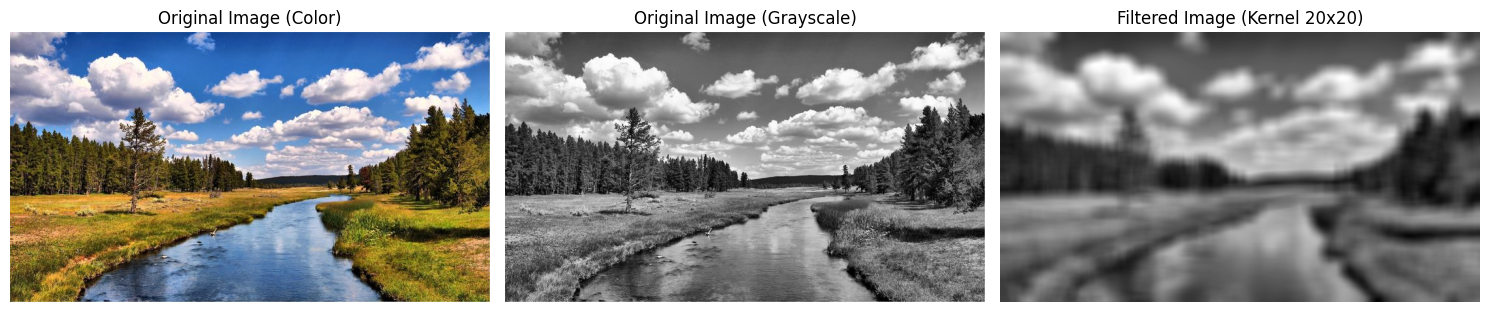

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk membuat filter moving average
def apply_moving_average_filter(image, kernel_size):
    # Buat kernel moving average
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    # Terapkan filter menggunakan cv2.filter2D
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Fungsi utama simulasi
def main():
    # Load gambar
    image = cv2.imread("Gambar 1.jpg")  # Memuat gambar dengan warna
    if image is None:
        print("Gambar tidak ditemukan. Pastikan file 'img1.jpg' ada.")
        return

    # Konversi ke grayscale untuk penerapan filter
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan moving average filter
    kernel_size = 20  # Ukuran kernel
    filtered_image = apply_moving_average_filter(grayscale_image, kernel_size)

    # Plot hasil
    plt.figure(figsize=(15, 5))
    # Gambar asli dalam warna
    plt.subplot(1, 3, 1)
    plt.title("Original Image (Color)")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk ditampilkan dengan matplotlib
    plt.axis("off")

    # Gambar grayscale
    plt.subplot(1, 3, 2)
    plt.title("Original Image (Grayscale)")
    plt.imshow(grayscale_image, cmap="gray")
    plt.axis("off")

    # Gambar setelah filter
    plt.subplot(1, 3, 3)
    plt.title(f"Filtered Image (Kernel {kernel_size}x{kernel_size})")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Filter moving average efektif digunakan untuk mengurangi noise atau menghasilkan tampilan gambar yang lebih halus. Namun, penerapan kernel berukuran besar (20x20) dapat menyebabkan hilangnya detail secara signifikan, sehingga membuat gambar menjadi buram. Untuk aplikasi yang memerlukan kejelasan detail yang tinggi, penggunaan kernel dengan ukuran lebih kecil mungkin lebih sesuai.

# **Deteksi Fitur dengan SIFT**

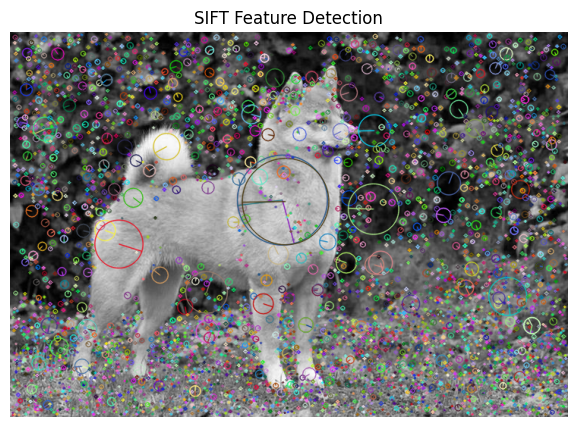

Jumlah fitur yang terdeteksi: 5119
Bentuk deskripsi fitur: (5119, 128)


In [6]:
import cv2
from matplotlib import pyplot as plt

def sift_feature_detection(image_path):
    # Load gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Buat objek SIFT
    sift = cv2.SIFT_create()

    # Deteksi keypoints dan deskripsi
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Gambar keypoints pada gambar asli
    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.title("SIFT Feature Detection")
    plt.imshow(image_with_keypoints, cmap="gray")
    plt.axis("off")
    plt.show()

    # Informasi tambahan
    print(f"Jumlah fitur yang terdeteksi: {len(keypoints)}")
    print(f"Bentuk deskripsi fitur: {descriptors.shape}")

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "Gambar 2.jpg"
    sift_feature_detection(image_path)


SIFT berhasil mengidentifikasi fitur pada area-area penting, khususnya pada pola simetris dan tekstur rinci di sayap kupu-kupu. Metode ini sangat berguna untuk tugas-tugas computer vision yang memerlukan deteksi fitur yang tahan terhadap variasi skala, rotasi, dan pencahayaan. Jumlah keypoint yang terdeteksi serta deskripsi fitur yang dihasilkan menyediakan representasi unik dari gambar, yang dapat digunakan untuk analisis lebih lanjut.

# **Representasi Histogram Gambar**

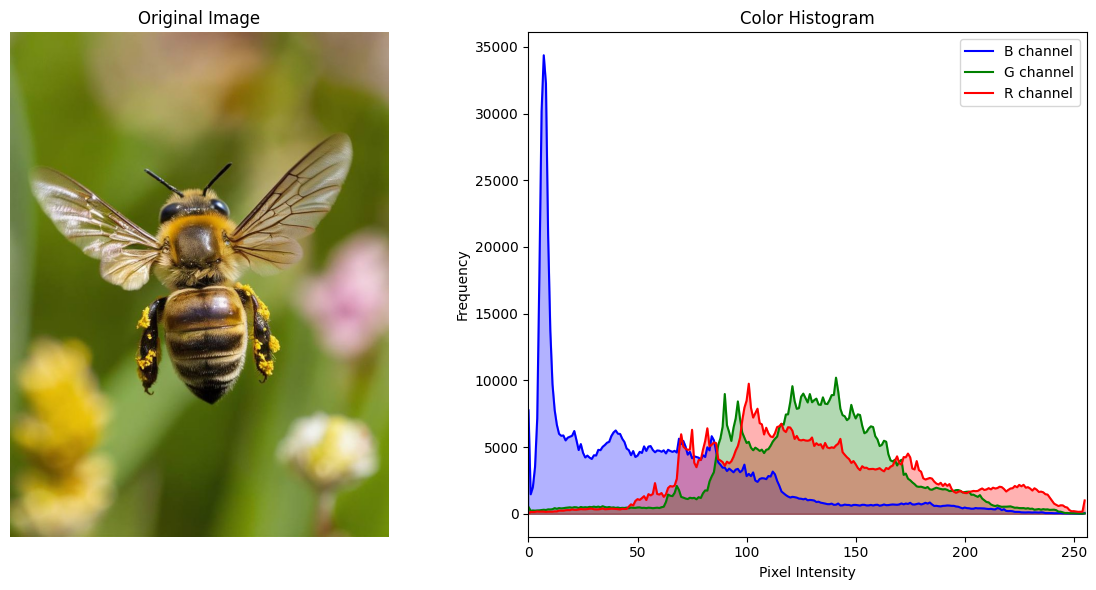

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def plot_color_histogram(image_path):
    # Load gambar dalam mode warna (BGR)
    image = cv2.imread(image_path)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Pisahkan channel warna (BGR)
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')  # Warna untuk plot (blue, green, red)
    histogram = {}

    # Plot gambar asli
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Plot histogram untuk setiap channel
    plt.subplot(1, 2, 2)
    plt.title("Color Histogram")
    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f"{color.upper()} channel")
        plt.fill_between(range(256), hist.flatten(), color=color, alpha=0.3)

    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "Gambar 3.jpg"
    plot_color_histogram(image_path)



Histogram menyediakan representasi visual dari distribusi warna dalam sebuah gambar, yang berguna untuk menganalisis karakteristik warna yang ada. Sebagai contoh, apabila histogram menunjukkan puncak pada area intensitas tinggi di kanal merah, hal ini mengindikasikan bahwa gambar tersebut memiliki warna merah yang terang. Sebaliknya, jika distribusi histogram lebih banyak terkonsentrasi pada intensitas rendah, maka gambar tersebut cenderung memiliki warna yang lebih gelap.

# **Gaussian Smoothing**

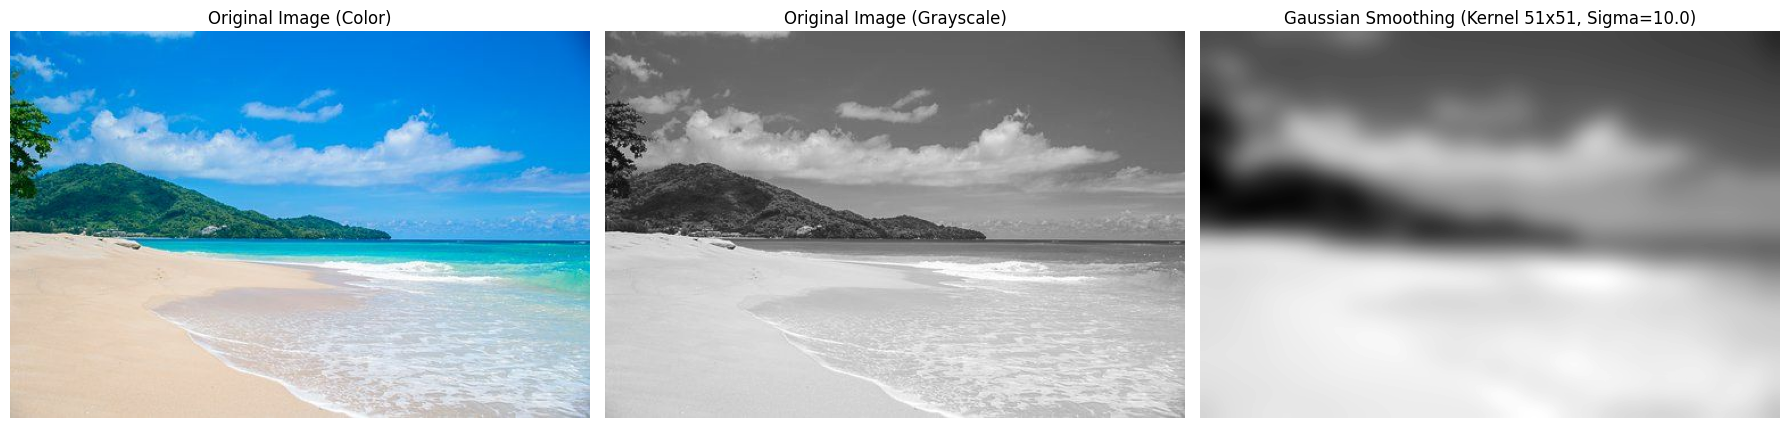

In [8]:
import cv2
from matplotlib import pyplot as plt

def apply_gaussian_smoothing(image_path, kernel_size, sigma):
    # Load gambar asli (warna)
    color_image = cv2.imread(image_path)
    if color_image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Konversi gambar ke grayscale untuk smoothing
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Terapkan Gaussian Smoothing pada gambar grayscale
    smoothed_image = cv2.GaussianBlur(grayscale_image, (kernel_size, kernel_size), sigma)

    # Tampilkan gambar asli (warna), grayscale asli, dan hasil smoothing
    plt.figure(figsize=(18, 6))

    # Gambar asli (warna)
    plt.subplot(1, 3, 1)
    plt.title("Original Image (Color)")
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk matplotlib
    plt.axis("off")

    # Gambar asli (grayscale)
    plt.subplot(1, 3, 2)
    plt.title("Original Image (Grayscale)")
    plt.imshow(grayscale_image, cmap="gray")
    plt.axis("off")

    # Gambar setelah Gaussian Smoothing
    plt.subplot(1, 3, 3)
    plt.title(f"Gaussian Smoothing (Kernel {kernel_size}x{kernel_size}, Sigma={sigma})")
    plt.imshow(smoothed_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "Gambar 4.jpg"

    # Parameter smoothing
    kernel_size = 51  # Ukuran kernel (harus ganjil, misalnya 3, 5, 7)
    sigma = 10.0  # Standar deviasi Gaussian

    # Panggil fungsi
    apply_gaussian_smoothing(image_path, kernel_size, sigma)

Hasil dari Gaussian smoothing menghasilkan gambar yang lebih halus dengan mengurangi detail dan tepi. Namun, penggunaan kernel yang besar dan nilai sigma yang tinggi dapat menghapus terlalu banyak detail penting, terutama jika pengolahan citra memerlukan tingkat presisi yang tinggi.

# **Deteksi Tepi dengan Sobel Filter**

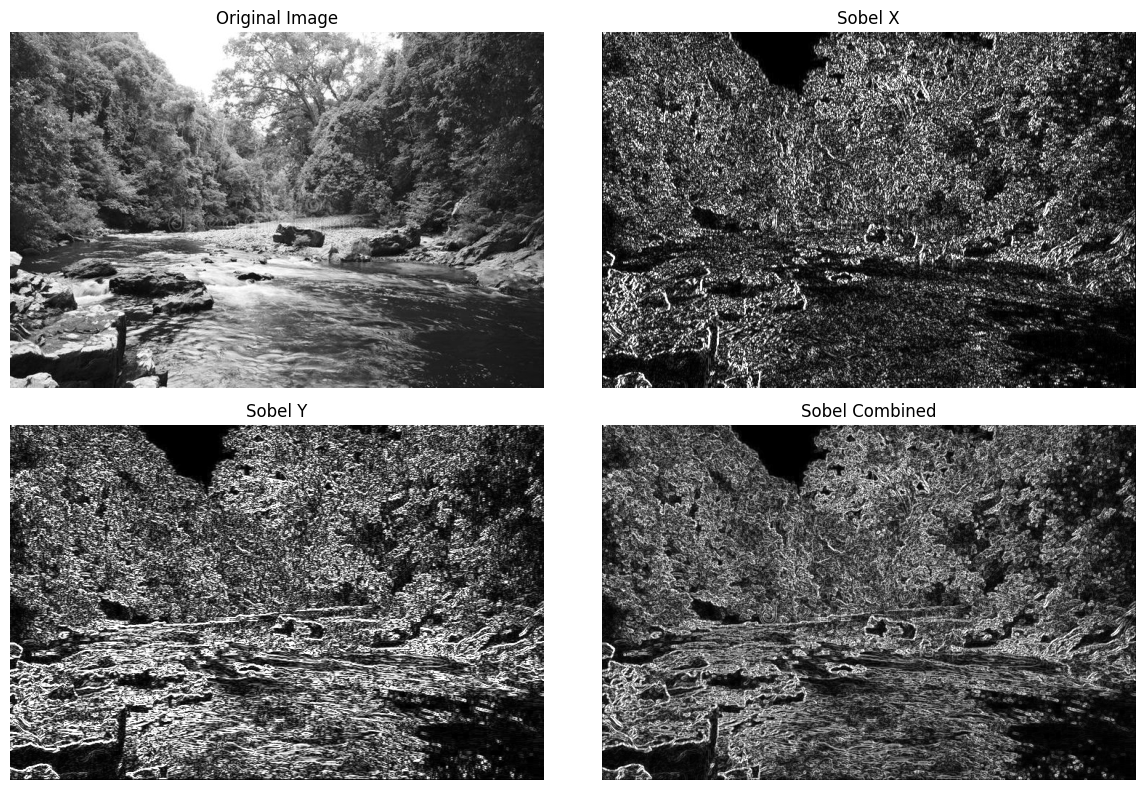

In [9]:
import cv2
from matplotlib import pyplot as plt

def sobel_edge_detection(image_path):
    # Load gambar dalam grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Deteksi tepi dengan Sobel (gradien horizontal dan vertikal)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

    # Mengambil nilai absolut dan mengubah tipe data menjadi uint8
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)

    # Kombinasikan gradien horizontal dan vertikal
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Tampilkan hasil
    plt.figure(figsize=(12, 8))

    # Gambar asli
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Sobel X
    plt.subplot(2, 2, 2)
    plt.title("Sobel X")
    plt.imshow(sobel_x, cmap="gray")
    plt.axis("off")

    # Sobel Y
    plt.subplot(2, 2, 3)
    plt.title("Sobel Y")
    plt.imshow(sobel_y, cmap="gray")
    plt.axis("off")

    # Sobel Combined
    plt.subplot(2, 2, 4)
    plt.title("Sobel Combined")
    plt.imshow(sobel_combined, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "Gambar 5.jpg"
    sobel_edge_detection(image_path)

Output dari Sobel X dan Y membantu dalam memahami arah gradien secara terpisah, sementara hasil kombinasi keduanya memberikan visualisasi yang lebih menyeluruh mengenai tepi-tepi dalam gambar. Namun, keberadaan noise dapat menyebabkan metode ini mendeteksi tepi palsu. Oleh karena itu, seringkali dilakukan tahap pra-pemrosesan seperti Gaussian smoothing sebelum menerapkan operator Sobel untuk mengurangi dampak noise.

# **Representasi Fitur dengan HOG**

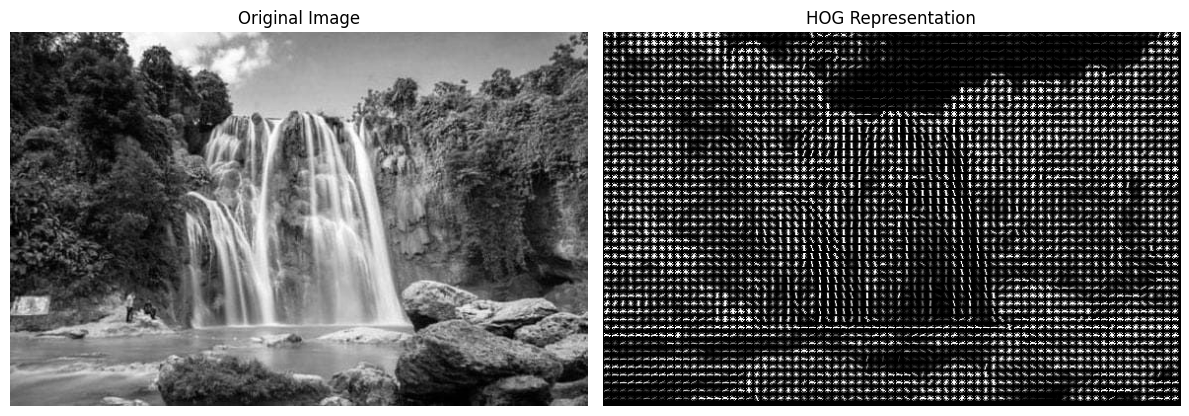

HOG Features Extracted: 119232 features


In [10]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def extract_hog_features(image_path, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    # Load gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Ekstraksi fitur HOG
    features, hog_image = hog(
        image,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        visualize=True,
        block_norm="L2-Hys"
    )

    # Tingkatkan kontras untuk visualisasi HOG
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Tampilkan gambar asli dan representasi HOG
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Visualisasi HOG
    plt.subplot(1, 2, 2)
    plt.title("HOG Representation")
    plt.imshow(hog_image_rescaled, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return features

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "Gambar 6.jpg"

    # Ekstraksi fitur HOG
    orientations = 9  # Jumlah orientasi
    pixels_per_cell = (8, 8)  # Ukuran piksel per sel
    cells_per_block = (2, 2)  # Ukuran sel per blok

    hog_features = extract_hog_features(image_path, orientations, pixels_per_cell, cells_per_block)

    print(f"HOG Features Extracted: {len(hog_features)} features")

Representasi HOG menghasilkan visualisasi pola-pola dominan dalam gambar, khususnya di area yang memiliki kontras tinggi. Teknik HOG sangat efektif dalam mengidentifikasi fitur-fitur struktural yang berkaitan dengan bentuk dan orientasi objek, sehingga sangat cocok untuk analisis objek atau pola dalam berbagai aplikasi.